In [537]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 1000) 
data = yf.download("KKP.BK", start="2020-01-01", end="2025-01-01")
data["Volume"] = data["Volume"].astype(float)

data.head(50)

C:\Users\kitti\AppData\Local\Temp\ipykernel_21284\1334108232.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("KKP.BK", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KKP.BK,KKP.BK,KKP.BK,KKP.BK,KKP.BK
Date,,,,,
2020-01-02,46.92,46.92,46.22,46.39,"2,800,400.00"
2020-01-03,47.62,47.62,46.92,47.09,"3,552,300.00"
2020-01-06,46.57,47.27,46.57,47.09,"2,015,800.00"
2020-01-07,46.92,47.09,46.39,46.74,"1,744,400.00"
2020-01-08,46.74,46.74,46.22,46.22,"2,002,400.00"
2020-01-09,46.92,47.44,46.57,46.92,"2,195,800.00"
2020-01-10,48.14,48.14,46.92,47.09,"5,723,700.00"
2020-01-13,48.14,48.32,47.79,48.32,"3,028,900.00"


In [538]:
# data คือ DataFrame ของคุณที่โหลดมาจาก yf.download("^GSPC", ...)

# 1. เข้าถึงคอลัมน์ MultiIndex (Header)
current_columns = data.columns

# 2. สร้างชื่อคอลัมน์ใหม่โดยดึงเอาเฉพาะชื่อคอลัมน์ด้านบน (Price, Close, High, ฯลฯ)
# .get_level_values(0) จะดึงเอาชื่อจากระดับบนสุด (Index 0)
new_columns = current_columns.get_level_values(0)

# 3. กำหนดชื่อคอลัมน์ใหม่ให้กับ DataFrame
data.columns = new_columns

# 4. ลบชื่อ Ticker ใน Index ออก เพื่อให้ดูสะอาดตา
data.columns.name = None 

data = data.reset_index()

print(data.head())

        Date  Close  High   Low  Open       Volume
0 2020-01-02  46.92 46.92 46.22 46.39 2,800,400.00
1 2020-01-03  47.62 47.62 46.92 47.09 3,552,300.00
2 2020-01-06  46.57 47.27 46.57 47.09 2,015,800.00
3 2020-01-07  46.92 47.09 46.39 46.74 1,744,400.00
4 2020-01-08  46.74 46.74 46.22 46.22 2,002,400.00


In [539]:
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [540]:
nan_rows = data[data.isnull().any(axis=1)]

if nan_rows.empty:
    print("Not Find NaN in DataFrame") 
else:
    print("Find NaN in DataFrame:", nan_rows.index.tolist())

Not Find NaN in DataFrame


In [541]:
data[["Open", "High", "Low", "Close", "Volume"]].describe()

,Open,High,Low,Close,Volume
count,"1,211.00","1,211.00","1,211.00","1,211.00","1,211.00"
mean,45.68,46.12,45.22,45.65,"4,237,724.11"
std,8.62,8.60,8.61,8.61,"3,432,364.36"
min,22.41,23.98,22.41,23.28,0.00
25%,41.96,42.36,41.56,42.05,"1,991,800.00"
50%,46.17,46.61,45.87,46.07,"3,264,600.00"
75%,52.19,52.61,51.46,51.95,"5,496,950.00"
max,62.96,63.16,61.92,62.75,"29,704,000.00"


In [542]:
data["Difference_between_Open_Close"] = data["Close"] - data["Open"]
data["Percent_Change_Open_Close"] = (data["Difference_between_Open_Close"] / data["Open"]) * 100

data["Difference_between_High_Low"] = data["High"] - data["Low"]
data["Percent_Change_High_Low"] = (data["Difference_between_High_Low"] / data["Low"]) * 100

original_columns_to_exclude = ['Close', 'High', 'Low', 'Open', 'Volume']

all_columns = data.columns.tolist()

new_feature_columns = [col for col in all_columns if col not in original_columns_to_exclude]

feature_table = data[new_feature_columns].copy() 

feature_table.head(20)

,Date,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
0,2020-01-02,0.53,1.13,0.70,1.52
1,2020-01-03,0.53,1.12,0.70,1.49
2,2020-01-06,-0.53,-1.12,0.70,1.50
3,2020-01-07,0.18,0.37,0.70,1.51
4,2020-01-08,0.53,1.14,0.53,1.14
5,2020-01-09,0.00,0.00,0.88,1.88
6,2020-01-10,1.05,2.23,1.23,2.61
7,2020-01-13,-0.18,-0.36,0.53,1.10
8,2020-01-14,-0.70,-1.45,0.70,1.47
9,2020-01-15,-0.18,-0.37,0.53,1.11


In [543]:
data[["Difference_between_Open_Close", "Percent_Change_Open_Close", "Difference_between_High_Low", "Percent_Change_High_Low"]].describe()

,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
count,"1,211.00","1,211.00","1,211.00","1,211.00"
mean,-0.03,-0.04,0.90,2.11
std,0.65,1.70,0.53,1.69
min,-4.38,-13.16,0.00,0.00
25%,-0.39,-0.83,0.62,1.35
50%,0.00,0.00,0.83,1.82
75%,0.35,0.68,1.12,2.52
max,6.48,28.91,8.40,37.50


In [544]:
data_diff_open_close_max_date = data["Difference_between_Open_Close"].idxmax()
data.loc[[data_diff_open_close_max_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
50,2020-03-13,28.89,30.81,22.41,22.41,"13,439,700.00",6.48,28.91,8.40,37.50


In [545]:
data_diff_open_close_min_date = data["Difference_between_Open_Close"].idxmin()
data.loc[[data_diff_open_close_min_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
49,2020-03-12,28.89,33.61,28.36,33.26,"11,861,300.00",-4.38,-13.16,5.25,18.52


In [546]:
sorted_data_max = data.sort_values(
    by="Difference_between_Open_Close", 
    ascending=False
)

top_5_diff = sorted_data_max.head(5)

print("--- 5 อันดับสูงสุดของผลต่าง Open-Close ---")
print(top_5_diff[['Date','Difference_between_Open_Close', 'Open', 'Close']])

--- 5 อันดับสูงสุดของผลต่าง Open-Close ---
           Date  Difference_between_Open_Close  Open  Close
50   2020-03-13                           6.48 22.41  28.89
556  2022-04-21                           2.55 56.66  59.21
1133 2024-09-06                           2.30 42.39  44.69
1158 2024-10-11                           2.30 45.61  47.92
104  2020-06-04                           2.23 34.99  37.23


In [547]:
data_percent_change_max_date = data["Percent_Change_Open_Close"].idxmax()
data.loc[[data_percent_change_max_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
50,2020-03-13,28.89,30.81,22.41,22.41,"13,439,700.00",6.48,28.91,8.40,37.50


In [548]:
data_percent_change_min_date = data["Percent_Change_Open_Close"].idxmin()
data.loc[[data_percent_change_min_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
49,2020-03-12,28.89,33.61,28.36,33.26,"11,861,300.00",-4.38,-13.16,5.25,18.52


In [549]:
sorted_data_max = data.sort_values(
    by="Percent_Change_Open_Close", 
    ascending=False
)

top_5_diff = sorted_data_max.head(5)

print("--- 5 อันดับสูงสุดของผลต่าง Open-Close ---")
print(top_5_diff[['Date','Percent_Change_Open_Close', 'Open', 'Close']])

--- 5 อันดับสูงสุดของผลต่าง Open-Close ---
          Date  Percent_Change_Open_Close  Open  Close
50  2020-03-13                      28.91 22.41  28.89
55  2020-03-20                       6.43 24.51  26.09
104 2020-06-04                       6.38 34.99  37.23
51  2020-03-16                       6.00 26.26  27.84
66  2020-04-07                       5.99 29.24  30.99


In [550]:
data_diff_high_low_max_date = data["Difference_between_High_Low"].idxmax()
data.loc[[data_diff_high_low_max_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
50,2020-03-13,28.89,30.81,22.41,22.41,"13,439,700.00",6.48,28.91,8.40,37.50


In [551]:
data_diff_high_low_min_date = data["Difference_between_High_Low"].idxmin()
data.loc[[data_diff_high_low_min_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
61,2020-03-30,26.09,26.09,26.09,26.09,"111,900.00",0.00,0.00,0.00,0.00


In [552]:
sorted_data_max = data.sort_values(
    by="Difference_between_High_Low", 
    ascending=False
)

top_5_diff = sorted_data_max.head(5)

print("--- 5 อันดับสูงสุดของผลต่าง High-Low ---")
print(top_5_diff[['Date','Difference_between_High_Low', 'Open', 'Close']])

--- 5 อันดับสูงสุดของผลต่าง High-Low ---
           Date  Difference_between_High_Low  Open  Close
50   2020-03-13                         8.40 22.41  28.89
49   2020-03-12                         5.25 33.26  28.89
556  2022-04-21                         3.33 56.66  59.21
564  2022-05-05                         3.23 59.39  56.76
1158 2024-10-11                         2.99 45.61  47.92


In [553]:
data_percent_change_max_date = data["Percent_Change_High_Low"].idxmax()
data.loc[[data_percent_change_max_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
50,2020-03-13,28.89,30.81,22.41,22.41,"13,439,700.00",6.48,28.91,8.40,37.50


In [554]:
data_percent_change_min_date = data["Percent_Change_High_Low"].idxmin()
data.loc[[data_percent_change_min_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
61,2020-03-30,26.09,26.09,26.09,26.09,"111,900.00",0.00,0.00,0.00,0.00


In [555]:
sorted_data_max = data.sort_values(
    by="Percent_Change_High_Low", 
    ascending=False
)

top_5_diff = sorted_data_max.head(5)

print("--- 5 อันดับสูงสุดของผลต่าง High-Low ---")
print(top_5_diff[['Date','Percent_Change_High_Low', 'Open', 'Close']])

--- 5 อันดับสูงสุดของผลต่าง High-Low ---
         Date  Percent_Change_High_Low  Open  Close
50 2020-03-13                    37.50 22.41  28.89
49 2020-03-12                    18.52 33.26  28.89
52 2020-03-17                    11.11 28.01  25.39
51 2020-03-16                    10.00 26.26  27.84
59 2020-03-26                     9.56 24.16  25.39


In [556]:
data_volume_max_date = data["Volume"].idxmax()

data.loc[[data_volume_max_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
556,2022-04-21,59.21,59.79,56.46,56.66,"29,704,000.00",2.55,4.50,3.33,5.90


In [557]:
data_volume_min_date = data["Volume"].idxmin()

data.loc[[data_volume_min_date]]

,Date,Close,High,Low,Open,Volume,Difference_between_Open_Close,Percent_Change_Open_Close,Difference_between_High_Low,Percent_Change_High_Low
1016,2024-03-12,46.17,46.17,46.17,46.17,0.00,0.00,0.00,0.00,0.00


In [558]:
sorted_data_max = data.sort_values(
    by="Volume", 
    ascending=False
)

top_5_diff = sorted_data_max.head(5)

print("--- 5 อันดับสูงสุดของ Volume ---")
print(top_5_diff[['Date','Volume', 'Open', 'Close']])

--- 5 อันดับสูงสุดของ Volume ---
          Date        Volume  Open  Close
556 2022-04-21 29,704,000.00 56.66  59.21
861 2023-07-24 27,541,400.00 48.59  47.32
104 2020-06-04 26,328,400.00 34.99  37.23
588 2022-06-10 22,034,700.00 55.75  54.14
692 2022-11-14 21,340,200.00 57.16  58.19


In [559]:
data_substraction_mean = data["Open"].mean()-data["Close"].mean()
data_substraction_max = data["Open"].max()-data["Close"].max()
data_substraction_min = data["Open"].min()-data["Close"].min()
data_substraction_max_min = data["Open"].max()-data["Close"].min()

print("ค่าเฉลี่ยของ Open - Close :",data_substraction_mean)
print("ค่าสูงสุดของ Open - Close :",data_substraction_max)
print("ค่าต่ำสุดของ Open - Close :",data_substraction_min)
print("ค่าสูงสุดของ Open - ค่าต่ำสุดของ Close :",data_substraction_max_min)       

ค่าเฉลี่ยของ Open - Close : 0.025397696111170376
ค่าสูงสุดของ Open - Close : 0.207094483028186
ค่าต่ำสุดของ Open - Close : -0.875352847937382
ค่าสูงสุดของ Open - ค่าต่ำสุดของ Close : 39.6731017156942


In [560]:
data_volume_mean = data["Volume"].mean()
data_volume_max = data["Volume"].max()
data_volume_min = data["Volume"].min()
print("ค่าเฉลี่ยของ Volume :",data_volume_mean)
print("ค่าสูงสุดของ Volume :",data_volume_max)
print("ค่าต่ำสุดของ Volume :",data_volume_min)

ค่าเฉลี่ยของ Volume : 4237724.112303881
ค่าสูงสุดของ Volume : 29704000.0
ค่าต่ำสุดของ Volume : 0.0


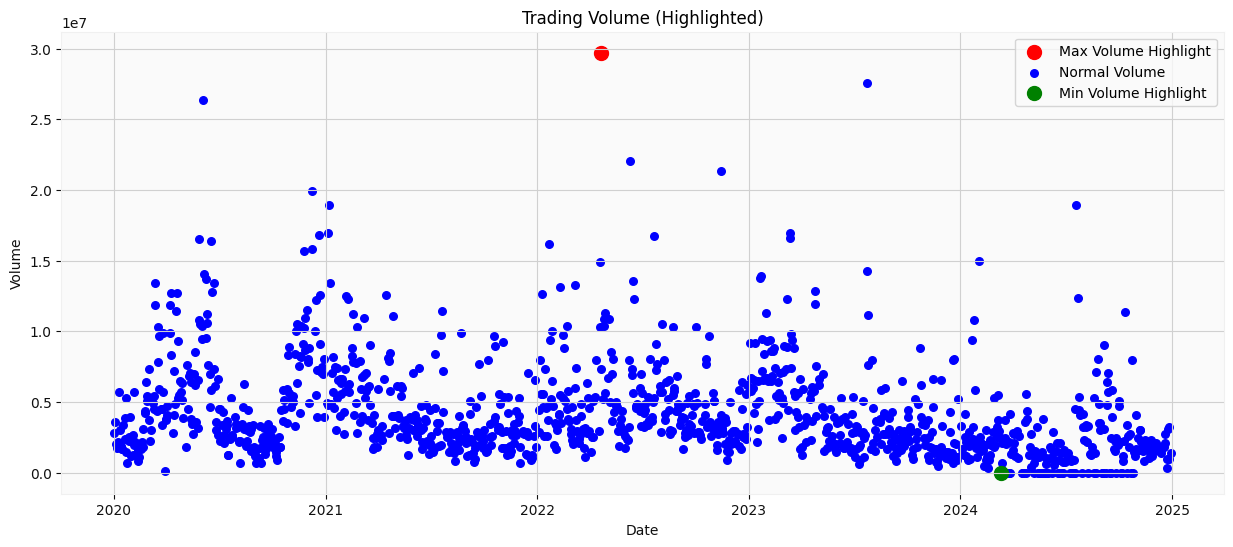

In [561]:
data["Color"] = "blue"

data['Color'] = np.where(data.index.isin([data["Volume"].idxmax()]), 'red', data['Color'])
data['Color'] = np.where(data.index.isin([data["Volume"].idxmin()]), 'green', data['Color'])

plt.figure(figsize=(15, 6))
plt.title("Trading Volume (Highlighted)")
plt.xlabel("Date")
plt.ylabel("Volume")

plt.scatter(
    data[data['Color'] == 'red']["Date"], 
    data[data['Color'] == 'red']['Volume'],
    c='red',
    label='Max Volume Highlight',
    s=100,  # ขนาดจุด
)

plt.scatter(
    data[data['Color'] == 'blue']["Date"],
    data[data['Color'] == 'blue']['Volume'],
    c='blue',
    label='Normal Volume', 
    s=30,  # ขนาดจุด
)

plt.scatter(
    data[data['Color'] == 'green']["Date"], 
    data[data['Color'] == 'green']['Volume'],
    c='green',
    label='Min Volume Highlight',
    s=100,  # ขนาดจุด
)

plt.legend()
plt.show()

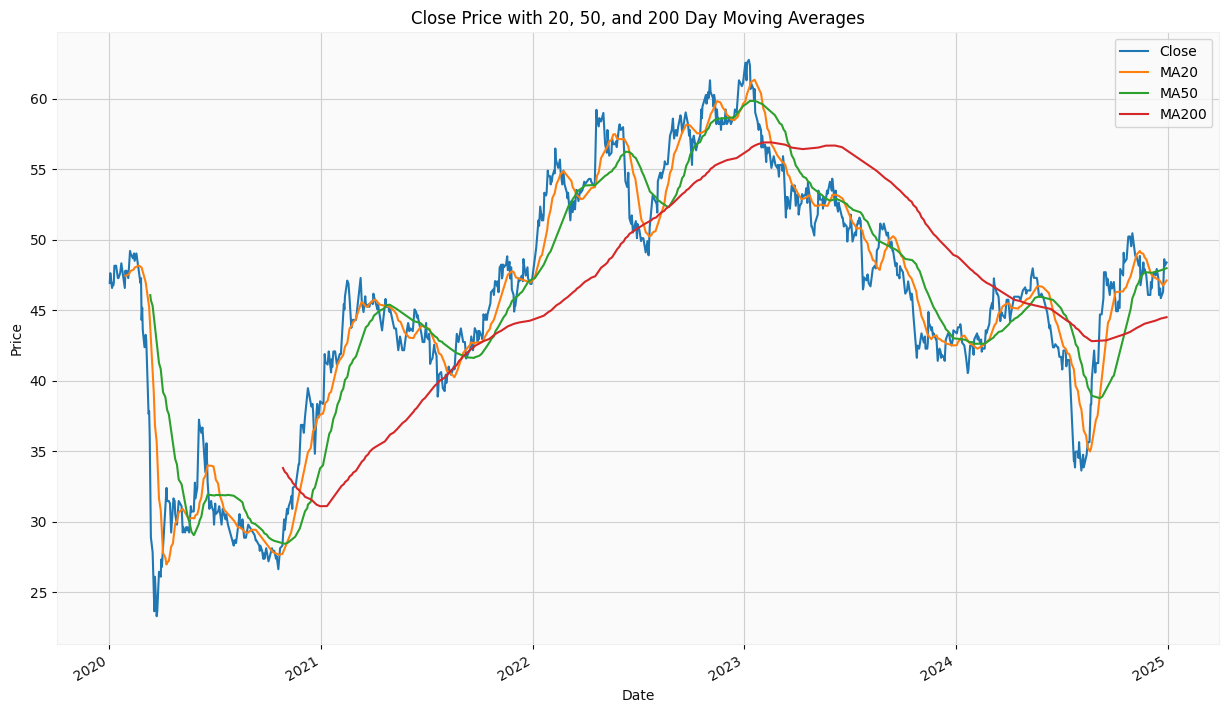

In [562]:
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

data.plot(x = "Date", y = ['Close', 'MA20', 'MA50', 'MA200'],figsize=(15,9))
plt.title('Close Price with 20, 50, and 200 Day Moving Averages') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

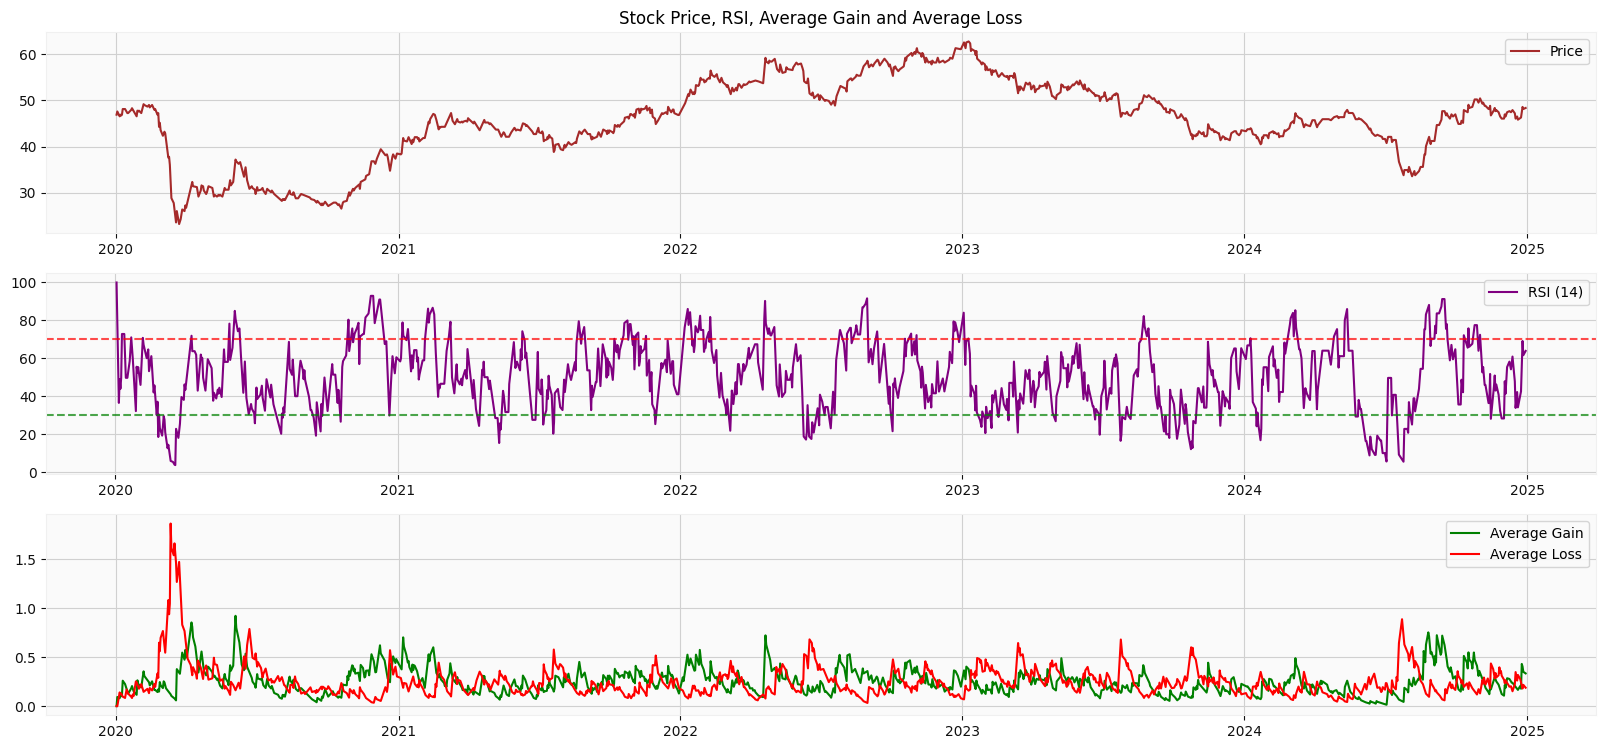

In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

price = data['Close']

delta = price.diff()

gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

period = 14

roll_up = pd.Series(gain, index=price.index).ewm(span=period, adjust=False).mean()
roll_down = pd.Series(loss, index=price.index).ewm(span=period, adjust=False).mean()

RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))

plt.figure(figsize=(20,12))

plt.subplot(4,1,1)
plt.plot(price, label="Price", color="brown")
plt.title("Stock Price, RSI, Average Gain and Average Loss")
plt.legend()

plt.subplot(4,1,2)
plt.plot(RSI, label="RSI (14)", color="purple")
plt.axhline(70, color="red", linestyle="--", alpha=0.7)   # overbought
plt.axhline(30, color="green", linestyle="--", alpha=0.7) # oversold
plt.legend()

plt.subplot(4,1,3)
plt.plot(roll_up, label="Average Gain", color="green")
plt.plot(roll_down, label="Average Loss", color="red")
plt.legend()



plt.show()


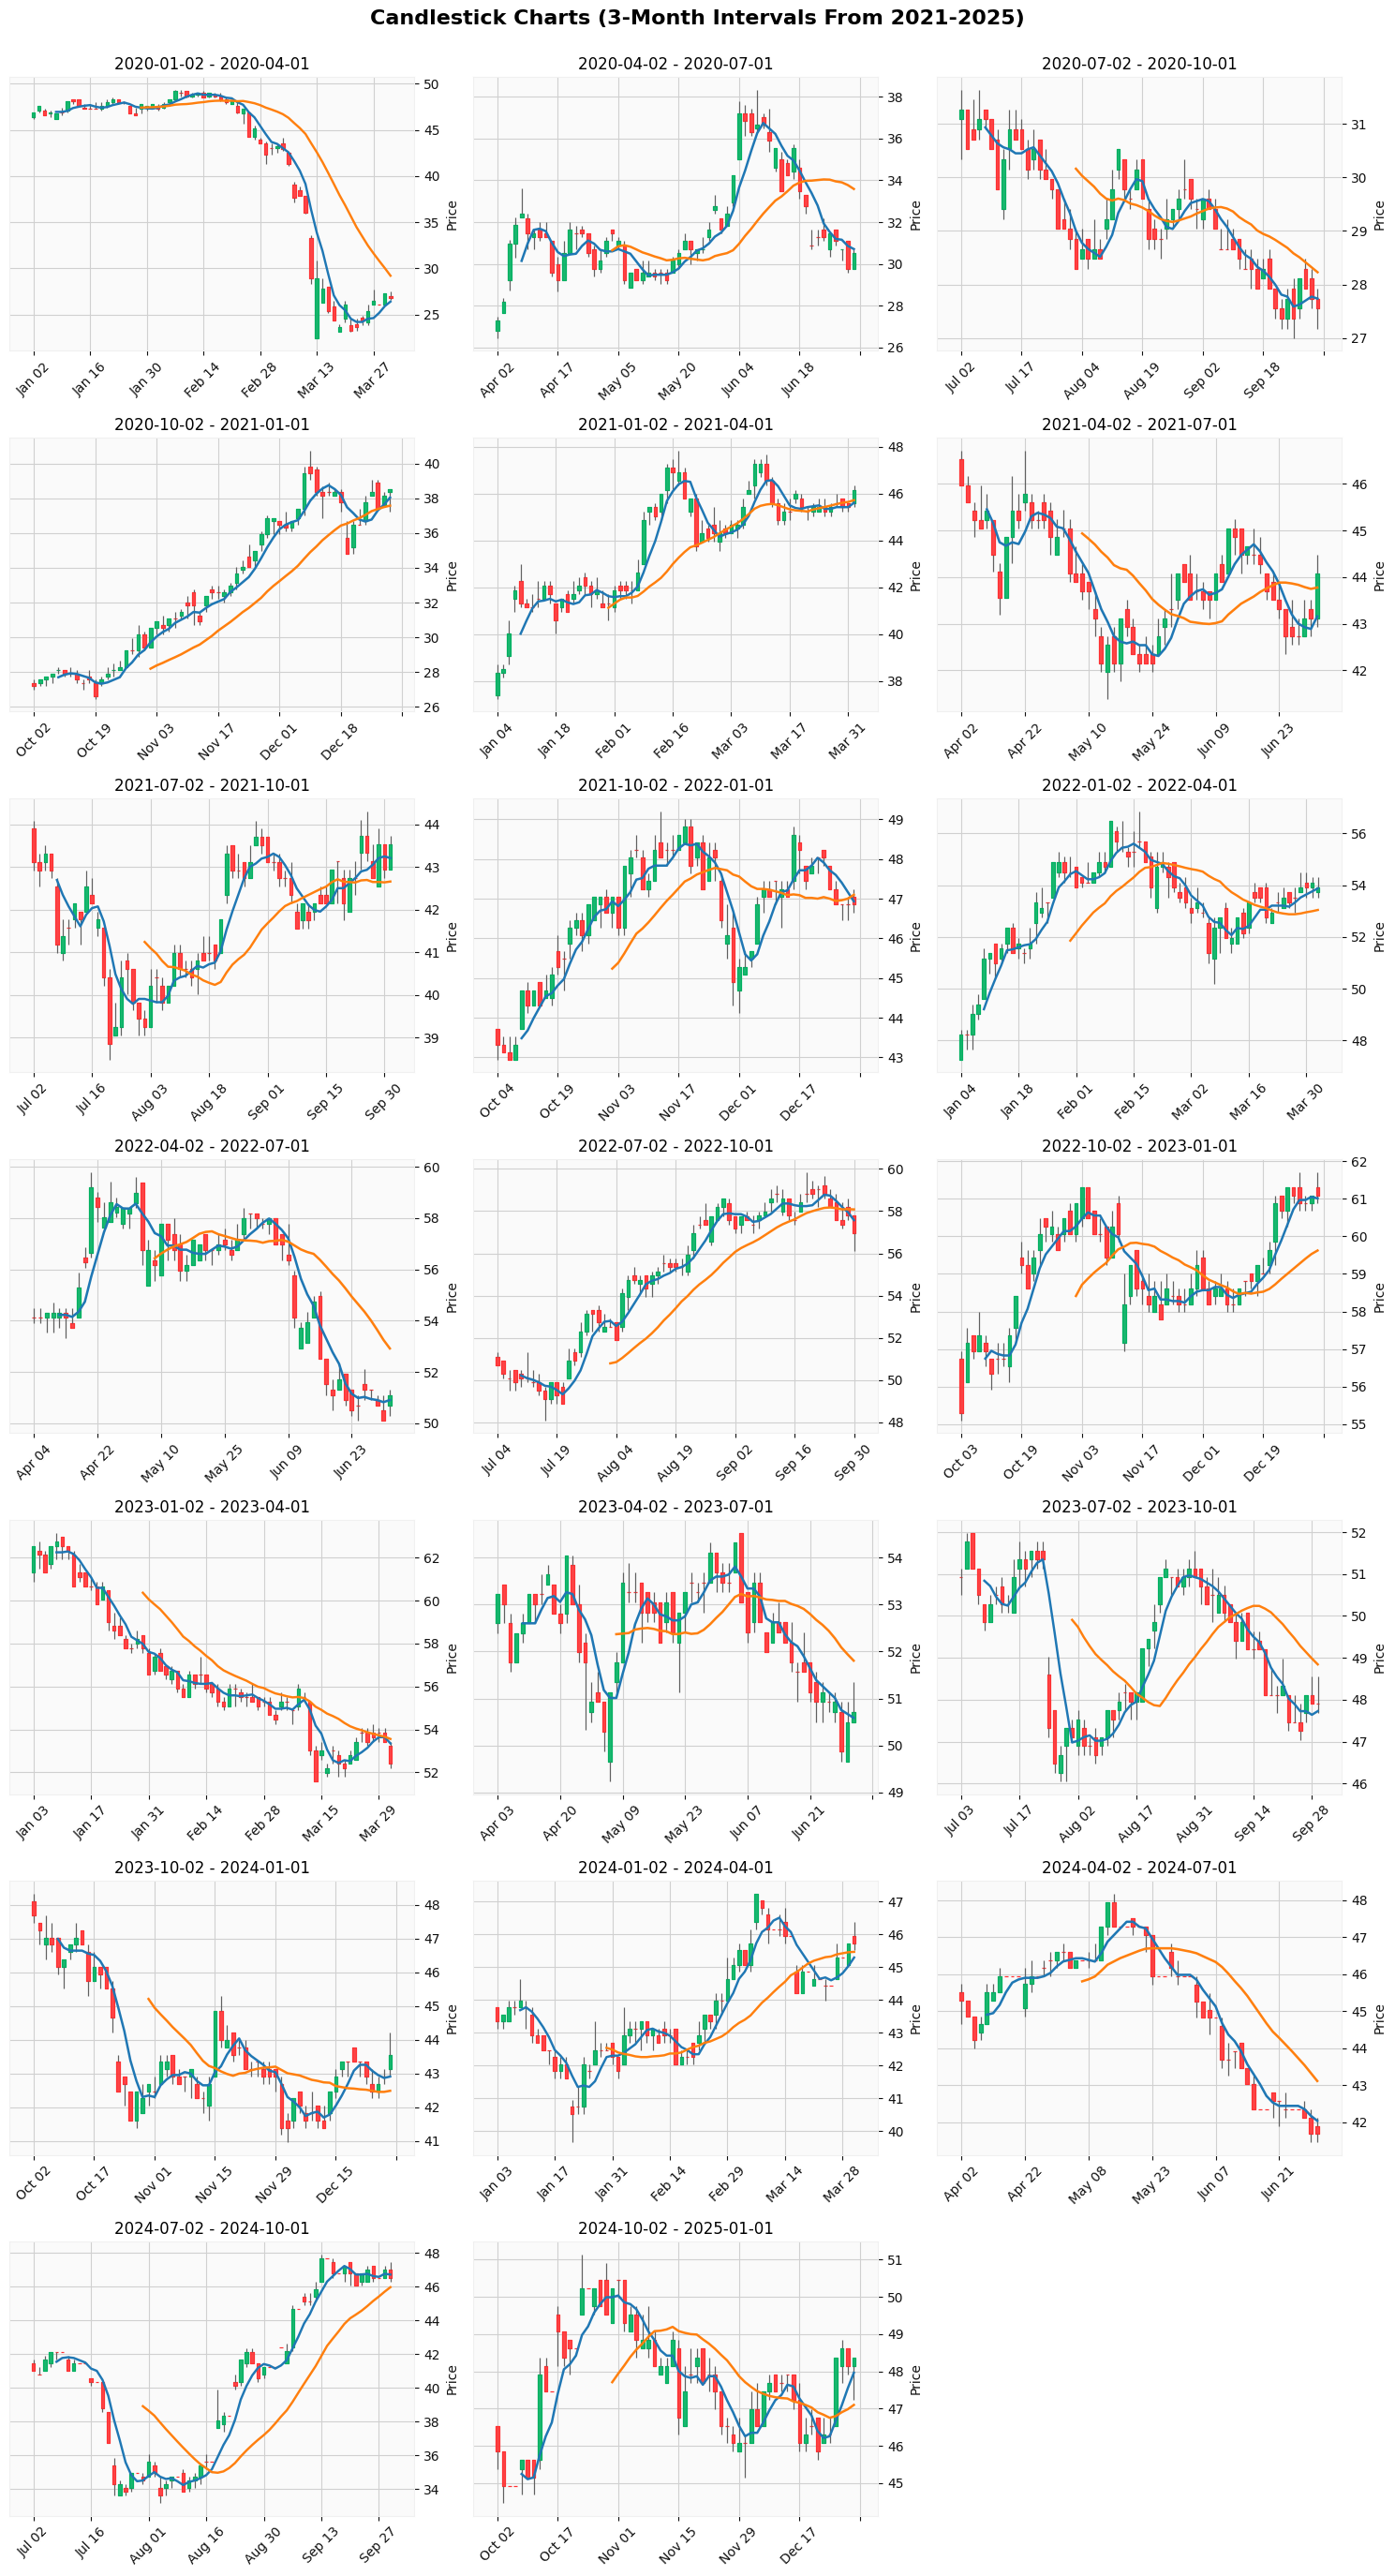

In [564]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import math

start = data.index.min()
end = data.index.max()

slices = []
current_start = start
while current_start <= end:
    current_end = current_start + pd.DateOffset(months=3) - pd.Timedelta(days=1)
    mask = (data.index >= current_start) & (data.index <= current_end)
    data_slice = data.loc[mask]
    if not data_slice.empty:
        slices.append((data_slice, f"{current_start.date()} - {current_end.date()}"))
    current_start = current_start + pd.DateOffset(months=3)

cols = 3
rows = math.ceil(len(slices)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()   

for i, (data_slice, title) in enumerate(slices):
    mpf.plot(
        data_slice,
        type='candle',
        volume=False,  
        mav=(5, 20),
        ax=axes[i],
        show_nontrading=False,
        style='yahoo'
    )
    axes[i].set_title(title)

# ปิด subplot ที่เกิน
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Candlestick Charts (3-Month Intervals From 2021-2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
